## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re

## Reading the data

In [3]:
df= pd.read_csv("C:\\Users\\shubh\\Downloads\\train_E6oV3lV.csv")

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
#Finding the number of rows and columns of the dataset
df.shape

(31962, 3)

In [6]:
# Finding out the null values
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
#dropping the column Unnamed:0
df.drop(columns = ['label'], axis = 1 , inplace = True)
df.head()

,id,tweet
0,1,@user when a father is dysfunctional and is s...
1,2,@user @user thanks for #lyft credit i can't us...
2,3,bihday your majesty
3,4,#model i love u take with u all the time in ...
4,5,factsguide: society now #motivation


In [8]:
for i in df.columns:
    print(i,":",df[str(i)].isnull().sum()/df.shape[0])

id : 0.0
tweet : 0.0


In [9]:
df.dropna(axis = 0,inplace = True)
for i in df.columns:
    print(i,":",df[str(i)].isnull().sum()/df.shape[0])

id : 0.0
tweet : 0.0


In [10]:
df['totalwords'] = df['tweet'].str.split().str.len() # Calculate word count

In [11]:
data = df.loc[df['totalwords'] > 5] #Removing all reviews having less than two words

In [12]:
df = data[data['tweet'].map(lambda x: x.isascii())] #Removing all non-english reviews

In [13]:
df1= pd.read_csv("C:\\Users\\shubh\\Downloads\\2020-12-31-DynamicallyGeneratedHateDataset-entries-v0.1.csv", usecols=['text'])

In [14]:
df = df.dropna(how='all') # dropping blank rows

In [15]:
df

,id,tweet,totalwords
0,1,@user when a father is dysfunctional and is s...,18
1,2,@user @user thanks for #lyft credit i can't us...,19
5,6,[2/2] huge fan fare and big talking before the...,19
9,10,@user @user welcome here ! i'm it's so #gr...,10
11,12,we are so selfish. #orlando #standwithorlando ...,14
...,...,...,...
31956,31957,off fishing tomorrow @user carnt wait first ti...,11
31958,31959,to see nina turner on the airwaves trying to...,23
31959,31960,listening to sad songs on a monday morning otw...,13
31960,31961,"@user #sikh #temple vandalised in in #calgary,...",10


In [16]:
df2 = df['tweet'].to_string(header=False, index=False)

In [17]:
df_review = re.sub(re.compile('<.*?>'), '', df2) #removing HTML tags
df_review = re.sub('[^A-Za-z0-9]+', ' ', df_review) #taking only words

print(df_review)

 user when a father is dysfunctional and is so user user thanks for lyft credit i can t use 2 2 huge fan fare and big talking before they user user welcome here i m it s so gr8 we are so selfish orlando standwithorlando i get to see my daddy today 80days gettin user cnn calls michigan middle school build no comment in australia opkillingbay sea i am thankful for having a paner thankful po as we all know essential oils are not made of euro2016 people blaming ha for conceded goal w sad little dude badday coneofshame cats product of the day happy man wine tool who s user user lumpy says i am a prove it lumpy user tgif ff to my gamedev indiedev in beautiful sign by vendor 80 for 45 00 upsid we had a great panel on the mediatization of th 50 people went to nightclub to have a good nigh i have never had a chance to vote for a preside alohafriday time does not exist positive user rip to the fellow nohern ireland fan who it was a hard monday due to cloudy weather dis it s unbelievable that in 

In [18]:
import nltk

from nltk.tokenize import word_tokenize

tokens = nltk.word_tokenize(df_review)

In [19]:
import re


def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text


# Example string with weird font characters plus an URL which we gonna remove.
sample =  df_review

sample = remove_url(sample)

In [20]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

print(filtered_review[0:10])

['user', 'father', 'dysfunctional', 'user', 'user', 'thanks', 'lyft', 'credit', 'use', '2']


In [21]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_review = [stemmer.stem(word) for word in filtered_review]

print(stemmed_review[0:10])

['user', 'father', 'dysfunct', 'user', 'user', 'thank', 'lyft', 'credit', 'use', '2']


In [22]:
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]

print(lemm_review[0:10])

['user', 'father', 'dysfunctional', 'user', 'user', 'thanks', 'lyft', 'credit', 'use', '2']


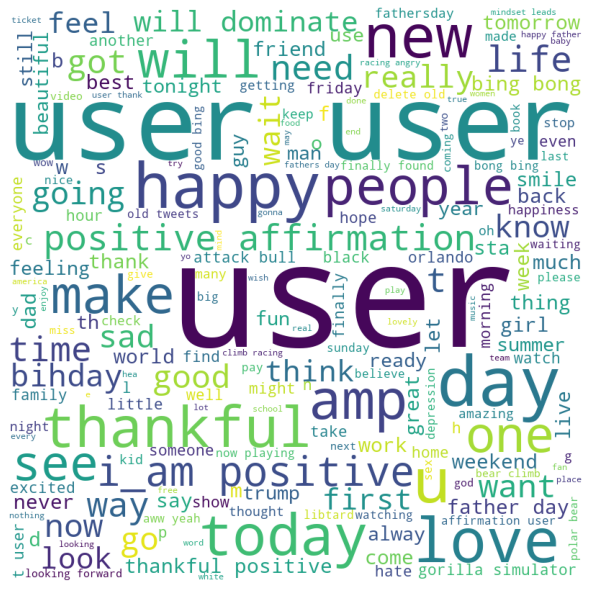

In [43]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df2:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(df2)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [28]:
pip install -U textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [29]:
import nltk

In [30]:
pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
import re


def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text


# Example string with weird font characters plus an URL which we gonna remove.
sample =  df_review

sample = remove_url(sample)
#print(f"Text after removing url:- \n {sample}")

In [32]:
!pip install demoji
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string


Defaulting to user installation because normal site-packages is not writeable


In [33]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text


sample = sample
#print(sample)
#print(word_tokenizer(sample))

In [34]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    
    return text

In [35]:
def preprocessing(text):
    
    text = remove_url(text) 
    text = handle_emoji(text)
    text = text.lower() 
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [36]:
from pprint import pprint

# Gensim
!pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
!pip install spacy
import spacy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [37]:
# Plotting tools
!pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable


In [38]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [39]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(sample, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df_review], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[df_review[:50]]])

[]


In [40]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['crypto','even','early'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
data_words_nostops = remove_stopwords(df2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [42]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
# Create Corpus
texts = data_words_bigrams
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:50])

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
